# Corrélation Age- Fréquence d'achats clients
## Quanti/Quanti

In [1]:
# Importation des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import datetime


from matplotlib import gridspec
from datetime import datetime

In [2]:
# Déclaration d'une fonction
def analyseDataFrame(df):
    """Fonction qui prend en arguments un dataframe pour analyse."""

    name =[x for x in globals() if globals()[x] is df][0]
    print("La dimension de DataFrame « " + name  +" » : " + str(df.shape) + " (lignes, colonnes)\n")
    display(df.info())
    display(df.head())
    display(df.describe().T)
    display(df.nunique())

In [3]:
# Importation du dataFrame 'df_enrichi'
df_enrichi = pd.read_csv("df_enrichi.csv", index_col="date_2", parse_dates= True)

# Vérifier que la première colonne est une idex
df_enrichi.index = pd.to_datetime(df_enrichi.index)

# Trier sur la colonne date
df_enrichi = df_enrichi.sort_index()

# Visualisualisation de df_enrichi
analyseDataFrame(df_enrichi)

La dimension de DataFrame « df_enrichi » : (679111, 11) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 679111 entries, 2021-03-01 00:01:07.843138 to 2023-02-28 23:58:30.792755
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  679111 non-null  int64  
 1   client_id   679111 non-null  object 
 2   sex         679111 non-null  object 
 3   birth       679111 non-null  float64
 4   age         679111 non-null  float64
 5   id_prod     679111 non-null  object 
 6   date        679111 non-null  object 
 7   session_id  679111 non-null  object 
 8   price       679111 non-null  float64
 9   categ       679111 non-null  float64
 10  _merge      679111 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 62.2+ MB


None

,Unnamed: 0,client_id,sex,birth,age,id_prod,date,session_id,price,categ,_merge
date_2,,,,,,,,,,,
2021-03-01 00:01:07.843138,129502,c_329,f,1967.0,55.0,0_1259,2021-03-01 00:01:07.843138,s_1,11.99,0.0,both
2021-03-01 00:02:26.047414,17306,c_664,m,1960.0,62.0,0_1390,2021-03-01 00:02:26.047414,s_2,19.37,0.0,both
2021-03-01 00:02:38.311413,146527,c_580,m,1988.0,34.0,0_1352,2021-03-01 00:02:38.311413,s_3,4.50,0.0,both
2021-03-01 00:04:54.559692,506717,c_7912,f,1989.0,33.0,0_1458,2021-03-01 00:04:54.559692,s_4,6.55,0.0,both
2021-03-01 00:05:18.801198,218220,c_2033,f,1956.0,66.0,0_1358,2021-03-01 00:05:18.801198,s_5,16.49,0.0,both


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,679111.0,339599.602812,196104.276737,0.00,169777.50,339555.00,509332.50,679331.0
birth,679111.0,1977.811149,13.575361,1929.00,1970.00,1980.00,1987.00,2004.0
age,679111.0,44.188851,13.575361,18.00,35.00,42.00,52.00,93.0
price,679111.0,17.454773,18.328998,0.62,8.87,13.99,18.99,300.0
categ,679111.0,0.441953,0.595042,0.00,0.00,0.00,1.00,2.0


Unnamed: 0    679111
client_id       8600
sex                2
birth             76
age               76
id_prod         3265
date          679111
session_id    342275
price           1442
categ              3
_merge             1
dtype: int64

In [4]:
df_temp = df_enrichi[["client_id", "session_id", "age"]].copy()
df_temp = df_temp.drop_duplicates(subset = "session_id")

nbr_sessions_total =df_temp.shape[0]

df_Age_FrequenceAchatsClient = df_temp.groupby(
    ["client_id", "age"]
).agg(
    {
        'session_id': ["count"]
    }).reset_index()
df_Age_FrequenceAchatsClient.columns = ["".join(x) for x in df_Age_FrequenceAchatsClient.columns]
df_Age_FrequenceAchatsClient.rename(columns = {"session_idcount" : "nbr_sessions"}, inplace = True)
df_Age_FrequenceAchatsClient['nbr_sessions%'] = df_Age_FrequenceAchatsClient["nbr_sessions"]*100 / nbr_sessions_total
df_Age_FrequenceAchatsClient.head()


,client_id,age,nbr_sessions,nbr_sessions%
0,c_1,67.0,33,0.009641
1,c_10,66.0,34,0.009934
2,c_100,30.0,5,0.001461
3,c_1000,56.0,93,0.027171
4,c_1001,40.0,47,0.013732


In [5]:
print("Affichage des individues qui ont 67 ans")
df_Age_FrequenceAchatsClient[df_Age_FrequenceAchatsClient["age"] == 67].sort_values(by=["client_id"], ascending=False).head(5)

Affichage des individues qui ont 67 ans


,client_id,age,nbr_sessions,nbr_sessions%
8595,c_995,67.0,9,0.002629
8411,c_8587,67.0,71,0.020744
8400,c_8577,67.0,75,0.021912
8246,c_8438,67.0,32,0.009349
8077,c_8285,67.0,86,0.025126


In [6]:
# Visualisualisation de df_QT_QT_ClientAgeCA
analyseDataFrame(df_Age_FrequenceAchatsClient)

La dimension de DataFrame « df_Age_FrequenceAchatsClient » : (8600, 4) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8600 entries, 0 to 8599
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   client_id      8600 non-null   object 
 1   age            8600 non-null   float64
 2   nbr_sessions   8600 non-null   int64  
 3   nbr_sessions%  8600 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 268.9+ KB


None

,client_id,age,nbr_sessions,nbr_sessions%
0,c_1,67.0,33,0.009641
1,c_10,66.0,34,0.009934
2,c_100,30.0,5,0.001461
3,c_1000,56.0,93,0.027171
4,c_1001,40.0,47,0.013732


,count,mean,std,min,25%,50%,75%,max
age,8600.0,43.739302,16.908755,18.000000,30.000000,43.000000,56.000000,93.000000
nbr_sessions,8600.0,39.799419,144.715605,1.000000,15.000000,26.000000,50.000000,10997.000000
nbr_sessions%,8600.0,0.011628,0.042281,0.000292,0.004382,0.007596,0.014608,3.212914


client_id        8600
age                76
nbr_sessions      165
nbr_sessions%     165
dtype: int64

# Visualisation de distribution de chaque variable

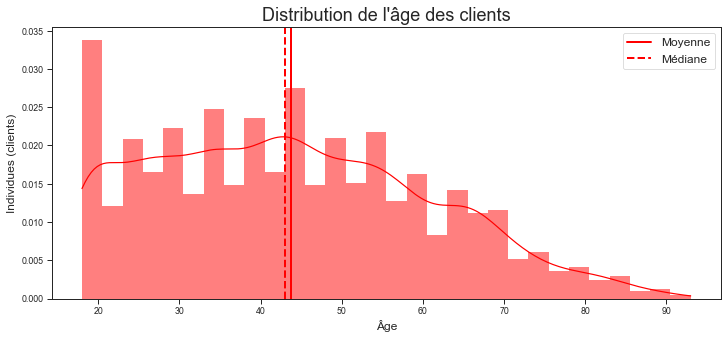

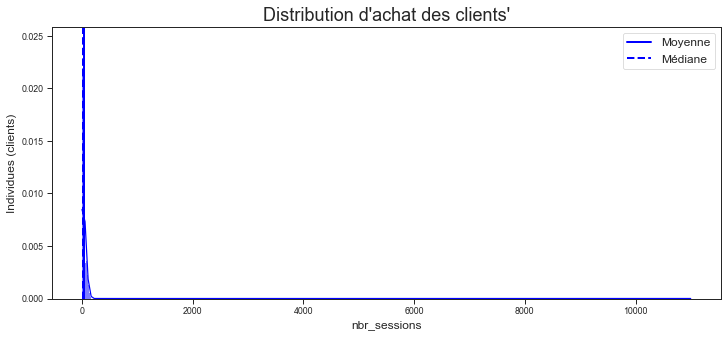

In [7]:
sns.set_style('ticks') # Parameters style dict, or one of {darkgrid, whitegrid, dark, white, ticks}

sns.set_context('paper') # Parameters context dict, or one of {paper, notebook, talk, poster}

plt.figure(figsize = (12,5))

_ = sns.histplot(df_Age_FrequenceAchatsClient["age"], color='red', kde=True, stat="density", linewidth=0)

_ = plt.axvline(x=df_Age_FrequenceAchatsClient["age"].mean(), label='Moyenne', linestyle='-', linewidth=2, color='red')
_ = plt.axvline(x=df_Age_FrequenceAchatsClient["age"].median(), label='Médiane', linestyle='--', linewidth=2, color='red')
_ = plt.title("Distribution de l'âge des clients", fontsize=18)
_ = plt.ylabel("Individues (clients)", fontsize=12)
_ = plt.xlabel("Âge", fontsize=12)
_ = plt.legend(prop={'size': 12})
_ = plt.show()

plt.figure(figsize = (12,5))
_ = sns.histplot(df_Age_FrequenceAchatsClient["nbr_sessions"], color='blue', binwidth=2,  kde=True, stat="density", linewidth=0)

_ = plt.axvline(x=df_Age_FrequenceAchatsClient["nbr_sessions"].mean(), label='Moyenne', linestyle='-', linewidth=2, color='blue')
_ = plt.axvline(x=df_Age_FrequenceAchatsClient["nbr_sessions"].median(), label='Médiane', linestyle='--', linewidth=2, color='blue')
_ = plt.title("Distribution d'achat des clients'", fontsize=18)
_ = plt.ylabel("Individues (clients)", fontsize=12)
_ = plt.xlabel("nbr_sessions", fontsize=12)
_ = plt.legend(prop={'size': 12})
_ = plt.show()

# _ = plt.tight_layout()

_ = plt.show()

# Test de normalité

### Test de normalité Smirnov-Kolmogorov

In [8]:

print("Premier test Smirnov-Kolmogorov -----------------------------------------------------------")
df_name = 'Âge'

stat, p_value = st.kstest(df_Age_FrequenceAchatsClient['age'], 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

alpha = 0.05

if p_value > alpha:
    print(f"L'échantillon '{df_name}' semble avoir une distribution Gaussienne (ne pas rejeter H0)")
else:
    print(f"L'échantillon '{df_name}' ne semble pas avoir une distribution Gaussienne (rejeter H0)")
print()
# Interprétation : si la valeur-p est inférieure à une seuil α qu’on s’est donné (en général, 5%),
# alors on rejette H0.

print("Deuxième test Smirnov-Kolmogorov -----------------------------------------------------------")
df_name = 'nbr_sessions'

stat, p_value = st.kstest(df_Age_FrequenceAchatsClient['nbr_sessions'], 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

alpha = 0.05

if p_value > alpha:
    print(f"L'échantillon '{df_name}' semble avoir une distribution Gaussienne (ne pas rejeter H0)")
else:
    print(f"L'échantillon '{df_name}' ne semble pas avoir une distribution Gaussienne (rejeter H0)")
print()
# Interprétation : si la valeur-p est inférieure à une seuil α qu’on s’est donné (en général, 5%),
# alors on rejette H0.

Premier test Smirnov-Kolmogorov -----------------------------------------------------------
Statistics=1.000, p=0.000
L'échantillon 'Âge' ne semble pas avoir une distribution Gaussienne (rejeter H0)

Deuxième test Smirnov-Kolmogorov -----------------------------------------------------------
Statistics=0.988, p=0.000
L'échantillon 'nbr_sessions' ne semble pas avoir une distribution Gaussienne (rejeter H0)



# Test de corrélation

In [9]:
x = df_Age_FrequenceAchatsClient["age"]
y = df_Age_FrequenceAchatsClient["nbr_sessions"]

x_name = "Âge"
y_name = "Nombre de sessions"

alpha = 0.05

r_pearson, p_value = st.pearsonr(x, y)

# r de Pearson
print('r de Pearson          :', r_pearson)


# indice de covariation
print('indice de covariation :', np.cov(x, y, ddof=0)[1,0])

# Coefficient de détermination / R2 / r-squared
print('r-squared             : ', r_pearson**2, " (le coefficient de détermination)")

print('p-value               : ', p_value)

print()

if p_value > alpha:
    print("Probablement independente :")
    print(f"Probablement la variable « {x_name} » n'est pas liée à la variable « {y_name} »")
else:
    print("Probablement dependente :")
    print(f"Probablement la variable « {x_name} » est liée à la variable « {y_name} »")
print()

r de Pearson          : 0.03414006681125429
indice de covariation : 83.52968564088695
r-squared             :  0.0011655441618769065  (le coefficient de détermination)
p-value               :  0.001542947178738423

Probablement dependente :
Probablement la variable « Âge » est liée à la variable « Nombre de sessions »



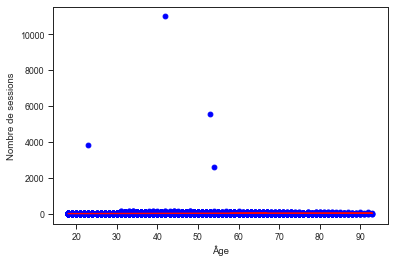

In [10]:
#linregress() renvoie plusieurs variables de retour. On s'interessera 
# particulierement au slope et intercept
slope, intercept, r_value, p_value, std_err = st.linregress(df_Age_FrequenceAchatsClient["age"],
                                                            df_Age_FrequenceAchatsClient["nbr_sessions"])

plt.plot(df_Age_FrequenceAchatsClient["age"],df_Age_FrequenceAchatsClient["nbr_sessions"],'bo')
plt.xlabel("Âge")
plt.ylabel("Nombre de sessions")
#la variable fitLine sera un tableau de valeurs prédites depuis la tableau de variables X
#fitLine = predict(df_QT_QT_ClientAgeCA['age'])
fitLine = slope * df_Age_FrequenceAchatsClient["age"] + intercept
plt.plot(df_Age_FrequenceAchatsClient["age"], fitLine, c='r')

In [11]:
B2B = df_Age_FrequenceAchatsClient[df_Age_FrequenceAchatsClient["nbr_sessions"]>= 2000]

display(B2B)

print("Probablement des clients B2B")

,client_id,age,nbr_sessions,nbr_sessions%
677,c_1609,42.0,10997,3.212914
2724,c_3454,53.0,5570,1.627346
4388,c_4958,23.0,3851,1.125119
6337,c_6714,54.0,2620,0.765466


Probablement des clients B2B


In [12]:
# Eliminer les clients B2B pour refaire le test de corrélation et affichier le graphique de la distribution en nuage de points 
df_Age_FrequenceAchatsClient = df_Age_FrequenceAchatsClient[df_Age_FrequenceAchatsClient["nbr_sessions"] < 2000]


# Test de corrélation pour B2C

In [13]:
x = df_Age_FrequenceAchatsClient["age"]
y = df_Age_FrequenceAchatsClient["nbr_sessions"]

x_name = "Âge"
y_name = "Nombre de sessions"

alpha = 0.05

r_pearson, p_value = st.pearsonr(x, y)

# r de Pearson
print('r de Pearson          :', r_pearson)


# indice de covariation    
print('indice de covariation :', np.cov(x, y, ddof=0)[1,0])

# Coefficient de détermination / R2 / r-squared
print('r-squared             : ', r_pearson**2, " (le coefficient de détermination)")

print('p-value               : ', p_value)

print()

if p_value > alpha:
    print("Probablement independente :")
    print(f"Probablement la variable « {x_name} » n'est pas liée à la variable « {y_name} »")
else:
    print("Probablement dependente :")
    print(f"Probablement la variable « {x_name} » est liée à la variable « {y_name} »")
print()

r de Pearson          : 0.16457484966114305
indice de covariation : 85.94398779416487
r-squared             :  0.027084881140987838  (le coefficient de détermination)
p-value               :  2.983595542499202e-53

Probablement dependente :
Probablement la variable « Âge » est liée à la variable « Nombre de sessions »



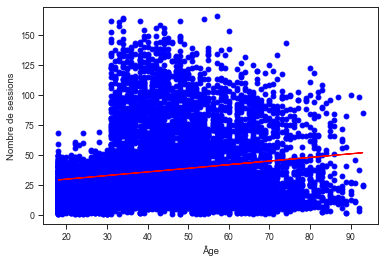

In [14]:
#linregress() renvoie plusieurs variables de retour. On s'interessera 
# particulierement au slope et intercept
slope, intercept, r_value, p_value, std_err = st.linregress(df_Age_FrequenceAchatsClient["age"],
                                                            df_Age_FrequenceAchatsClient["nbr_sessions"])

plt.plot(df_Age_FrequenceAchatsClient["age"],df_Age_FrequenceAchatsClient["nbr_sessions"],'bo')
plt.xlabel("Âge")
plt.ylabel("Nombre de sessions")
#la variable fitLine sera un tableau de valeurs prédites depuis la tableau de variables X
#fitLine = predict(df_QT_QT_ClientAgeCA['age'])
fitLine = slope * df_Age_FrequenceAchatsClient["age"] + intercept
plt.plot(df_Age_FrequenceAchatsClient["age"], fitLine, c='r')

In [15]:
df_moins_50ans = df_Age_FrequenceAchatsClient[df_Age_FrequenceAchatsClient['age']<=50]
print(df_moins_50ans.shape)
display(df_moins_50ans.head())

(5631, 4)


,client_id,age,nbr_sessions,nbr_sessions%
2,c_100,30.0,5,0.001461
4,c_1001,40.0,47,0.013732
5,c_1002,40.0,19,0.005551
6,c_1003,40.0,45,0.013147
7,c_1004,49.0,32,0.009349


In [16]:
x = df_moins_50ans["age"]
y = df_moins_50ans["nbr_sessions"]

x_name = "Âge"
y_name = "Nombre de sessions"

alpha = 0.05

r_pearson, p_value = st.pearsonr(x, y)

# r de Pearson
print('r de Pearson          :', r_pearson)


# indice de covariation
print('indice de covariation :', np.cov(x, y, ddof=0)[1,0])

# Coefficient de détermination / R2 / r-squared
print('r-squared             : ', r_pearson**2, " (le coefficient de détermination)")

print('p-value               : ', p_value)

print()

if p_value > alpha:
    print("Probablement independente :")
    print(f"Probablement la variable « {x_name} » n'est pas liée à la variable « {y_name} »")
else:
    print("Probablement dependente :")
    print(f"Probablement la variable « {x_name} » est liée à la variable « {y_name} »")
print()

r de Pearson          : 0.3897374532348376
indice de covariation : 120.21572127756005
r-squared             :  0.15189528245397724  (le coefficient de détermination)
p-value               :  1.139100314756195e-203

Probablement dependente :
Probablement la variable « Âge » est liée à la variable « Nombre de sessions »



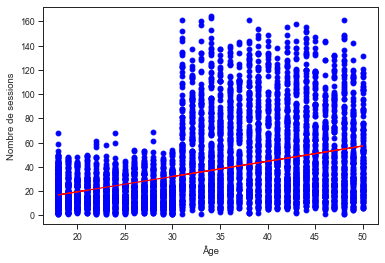

In [17]:
#linregress() renvoie plusieurs variables de retour. On s'interessera 
# particulierement au slope et intercept
slope, intercept, r_value, p_value, std_err = st.linregress(df_moins_50ans["age"],
                                                            df_moins_50ans["nbr_sessions"])

plt.plot(df_moins_50ans["age"],df_moins_50ans["nbr_sessions"],'bo')
plt.xlabel("Âge")
plt.ylabel("Nombre de sessions")
#la variable fitLine sera un tableau de valeurs prédites depuis la tableau de variables X
#fitLine = predict(df_QT_QT_ClientAgeCA['age'])
fitLine = slope * df_moins_50ans["age"] + intercept
plt.plot(df_moins_50ans["age"], fitLine, c='r')

In [18]:
df_plus_50ans = df_Age_FrequenceAchatsClient[df_Age_FrequenceAchatsClient['age']>50]
print(df_plus_50ans.shape)
display(df_plus_50ans.head())

(2965, 4)


,client_id,age,nbr_sessions,nbr_sessions%
0,c_1,67.0,33,0.009641
1,c_10,66.0,34,0.009934
3,c_1000,56.0,93,0.027171
8,c_1005,81.0,23,0.006720
10,c_1007,81.0,19,0.005551


In [19]:
x = df_plus_50ans["age"]
y = df_plus_50ans["nbr_sessions"]

x_name = "Âge"
y_name = "Nombre de sessions"

alpha = 0.05

r_pearson, p_value = st.pearsonr(x, y)

# r de Pearson
print('r de Pearson          :', r_pearson)


# indice de covariation    
print('indice de covariation :', np.cov(x, y, ddof=0)[1,0])

# Coefficient de détermination / R2 / r-squared
print('r-squared             : ', r_pearson**2, " (le coefficient de détermination)")

print('p-value               : ', p_value)

print()

if p_value > alpha:
    print("Probablement independente :")
    print(f"Probablement la variable « {x_name} » n'est pas liée à la variable « {y_name} »")
else:
    print("Probablement dependente :")
    print(f"Probablement la variable « {x_name} » est liée à la variable « {y_name} »")
print()

r de Pearson          : -0.03822115972990507
indice de covariation : -10.440403584255892
r-squared             :  0.001460857051098917  (le coefficient de détermination)
p-value               :  0.03742527764295783

Probablement dependente :
Probablement la variable « Âge » est liée à la variable « Nombre de sessions »



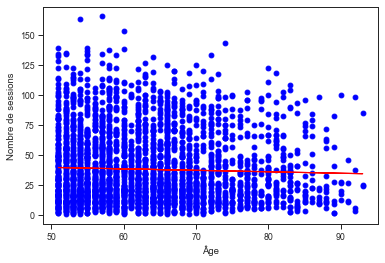

In [20]:
#linregress() renvoie plusieurs variables de retour. On s'interessera 
# particulierement au slope et intercept
slope, intercept, r_value, p_value, std_err = st.linregress(df_plus_50ans["age"],
                                                            df_plus_50ans["nbr_sessions"])

plt.plot(df_plus_50ans["age"],df_plus_50ans["nbr_sessions"],'bo')
plt.xlabel("Âge")
plt.ylabel("Nombre de sessions")
#la variable fitLine sera un tableau de valeurs prédites depuis la tableau de variables X
#fitLine = predict(df_QT_QT_ClientAgeCA['age'])
fitLine = slope * df_plus_50ans["age"] + intercept
plt.plot(df_plus_50ans["age"], fitLine, c='r')